In [1]:
pwd

'/data/mayu-ot/Experiments/neurocomp_vgp/notebooks/exploration'

In [2]:
VGENOME_ROOT = "/data/mayu-ot/durga/Dataset/VisualGenome"

In [45]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

In [44]:
def draw_bbox(im, bboxes, linewidth=2):
    """
    bboxes: List[bbox] where bbox is (x_min, y_min, x_max, y_max)
    """
    for b in bboxes:
        x_min, y_min, x_max, y_max = b
        
        im[y_min:y_min+linewidth, x:x+w, :] = [255, 0, 0]
        im[y_min:y_max, x_min:x_min+linewidth, :] = [255, 0, 0]
        im[y_max:y_max+linewidth, x_min:x_max, :] = [255, 0, 0]
        im[y_min:y_max, x_max:x_max+linewidth, :] = [255, 0, 0]
        
    return im

def _iou(x1, x2):
    """
    x1, x2 = x_min, y_min, x_max, y_max
    """
    tl = np.maximum(x1[:2], x2[:2])
    br = np.minimum(x1[2:], x2[2:])
    area_i = np.prod(br - tl) * (tl < br).all()
    area_a = np.prod(x1[2:] - x1[:2])
    area_b = np.prod(x2[2:] - x2[:2])

    return area_i / (area_a + area_b - area_i)

In [4]:
data = json.load(open(f"{VGENOME_ROOT}/region_descriptions.json"))

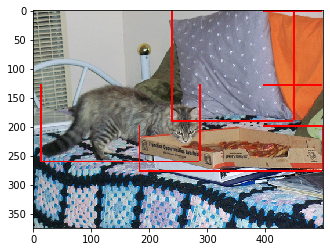

In [79]:
i = np.random.randint(len(data))
item = data[i]
im_id = item["id"]
regions = item["regions"]

im = plt.imread(f"{VGENOME_ROOT}/VG_100K/{im_id}.jpg")
im = im.copy()

bboxes = []
for r in regions:
    x, y, w, h = r["x"], r["y"], r["width"], r["height"]
    bboxes.append((x, y, x+w, y+h))
    
im = draw_bbox(im, bboxes[:3], 3)

plt.imshow(im)

In [81]:
thresh = .8
iou_mat = squareform(pdist(bboxes, metric=_iou))
idx1, idx2 = np.where(iou_mat > thresh)
for i1, i2 in zip(idx1, idx2):
    if i1 < i2:
        print(regions[i1]["phrase"],"---" ,regions[i2]["phrase"])

a fuzzy grey kitty smelling pizza --- a fluffy kitty with a striped tail
a fuzzy grey kitty smelling pizza --- The cat is gray and white with black stripes.
pizza in a cardboard delivery box --- A cardboard pizza box.
a large crocheted quilt --- A granny square crochet blanket on the bed.
a large crocheted quilt --- Black crochet boarders on the blanket.
a fluffy kitty with a striped tail --- The cat is gray and white with black stripes.
Two folders beneath the pizza box. --- A white and a blue folder.
A granny square crochet blanket on the bed. --- Black crochet boarders on the blanket.
